<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/CurrentSquad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-dateutil

In [18]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import os
from google.colab import drive
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-18-0add23fc2424>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Setting the search parameters:
filename = 'inter-milan.xlsx'
search_path = '/content/drive/My Drive/Datasets/Soccer'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

In [7]:
# Importing and displaying the last 10 goals scored:
df = pd.ExcelFile(file)
squad = pd.read_excel(df, 'Definite squad')
squad.tail(10)

,Number,Position,Nationality,Player,Contract until,Date of birth
17,36,DF,Italy,Matteo Darmian,2025-06-30,1989-12-02
18,95,DF,Italy,Alessandro Bastoni,2028-06-30,1999-04-13
19,—,GK,Romania,Ionuț Radu,2025-06-30,1997-05-28
20,12,GK,Italy,Raffaele Di Gennaro,2024-06-30,1993-10-03
21,11,FW,Argentina,Joaquín Correa,2025-06-30,1994-08-13
22,—,FW,Italy,Eddie Salcedo,NaT,2001-10-01
23,7,MF,Poland,Piotr Zieliński,2028-06-30,1994-05-20
24,99,FW,Iran,Mehdi Taremi,2027-06-30,1992-07-18
25,13,GK,Spain,Josep Martínez,2029-06-30,1998-05-27
26,42,DF,Argentina,Tomás Palacios,2029-06-30,2003-04-28


In [8]:
# Displaying statistical data of the numerical data present in the dataset:
squad.describe()

,Contract until,Date of birth
count,26,27
mean,2027-04-07 04:36:55.384615424,1995-12-13 16:00:00
min,2024-06-30 00:00:00,1988-02-10 00:00:00
25%,2025-06-30 00:00:00,1993-02-24 00:00:00
50%,2027-06-30 00:00:00,1997-02-07 00:00:00
75%,2028-06-30 00:00:00,1999-01-23 00:00:00
max,2029-06-30 00:00:00,2003-04-28 00:00:00


In [9]:
# Displaying the number of rows and columns in the dataset:
squad.shape

(27, 6)

# **Plotting basic column data**

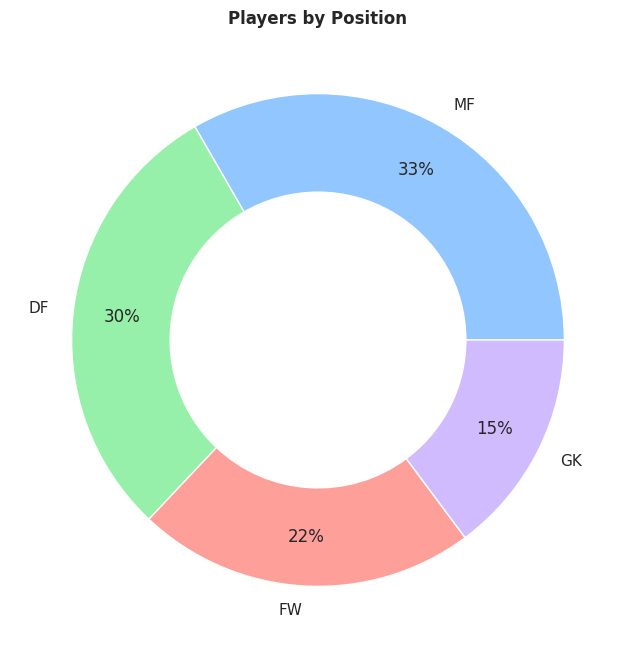

In [10]:
# Displaying players by position:
squad['Position'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by Position', fontweight = 'bold')
plt.show()

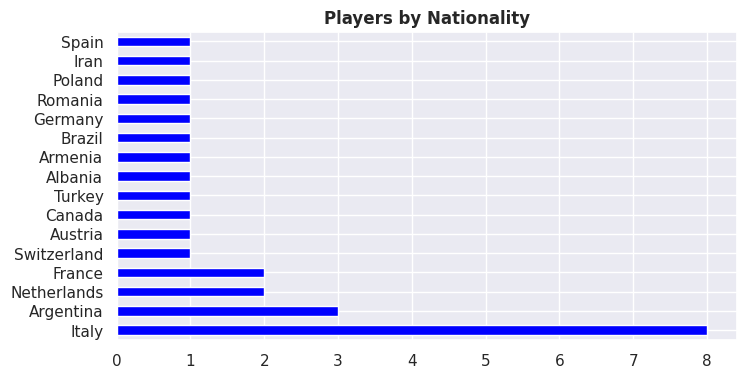

In [11]:
# Displaying players by nationality:
squad['Nationality'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Players by Nationality', fontweight = 'bold')
plt.show()

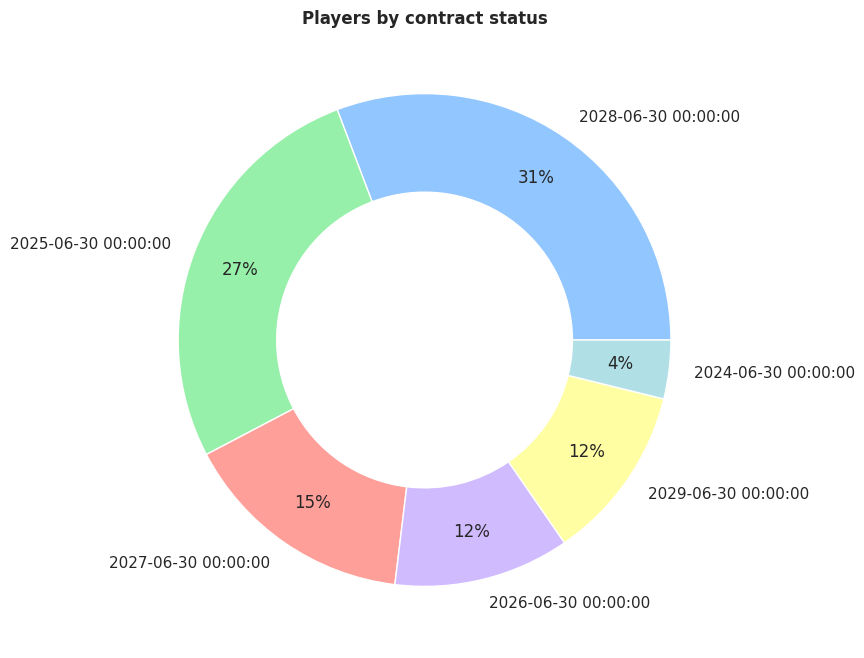

In [12]:
# Displaying players by contract status:
squad['Contract until'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by contract status', fontweight = 'bold')
plt.show()

In [13]:
# Creating a datetime object based on the dates from the dataset:
squad['Date of birth'] = squad['Date of birth'].map(pd.to_datetime)
squad['Birth year'] = squad['Date of birth'].apply(lambda x : x.year)

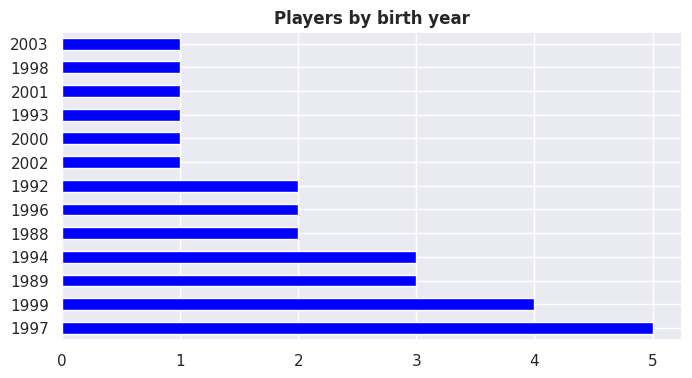

In [14]:
# Displaying players by birth year:
squad['Birth year'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Players by birth year', fontweight = 'bold')
plt.show()

In [19]:
now = date.today()
squad['Player age'] = squad.apply(lambda x: relativedelta(now, x['Date of birth']).years if x['Date of birth'] is not pd.NaT else pd.NaT, axis=1)
squad.tail(50)

NameError: name 'relativedelta' is not defined

In [ ]:
# Displaying statistical data of the numerical data present in the dataset (after the creation of the 'Player age' column):
squad.describe()

,Contract until,Date of birth,Birth year,Player age
count,35,42,42.000000,42.000000
mean,2026-10-12 13:01:42.857142784,1998-06-06 13:08:34.285714304,1998.047619,25.619048
min,2024-06-30 00:00:00,1988-02-10 00:00:00,1988.000000,19.000000
25%,2025-06-30 00:00:00,1995-01-08 06:00:00,1994.500000,21.250000
50%,2026-06-30 00:00:00,1999-03-12 00:00:00,1999.000000,25.000000
75%,2027-12-30 00:00:00,2002-08-13 00:00:00,2002.000000,28.750000
max,2029-06-30 00:00:00,2005-06-28 00:00:00,2005.000000,36.000000
std,NaN,NaN,4.967958,4.878786


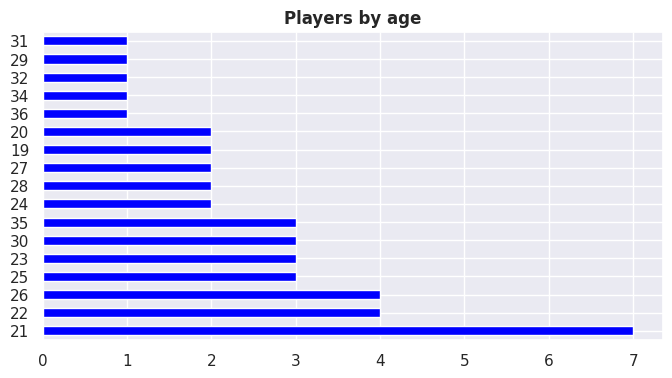

In [ ]:
# Displaying players by age:
squad['Player age'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Players by age', fontweight = 'bold')
plt.show()

In [ ]:
# Classifying Italian and Non Italian players under 23 years old:
def italian_players_u23(row):
  player = row['Player']
  age = row['Player age']
  nationality = row['Nationality']

  if age <= 23:
    if nationality == 'Italy':
      return 'Italian, U23'
    else:
      return 'Non Italian, older'
  else:
    return 'Older player'

# Applying the function above on a column of the dataset and generating a new column as result:
squad['U23 and Italian?'] = squad.apply(italian_players_u23, axis=1)
squad.tail()

,Number,Position,Nationality,Player,Contract until,Date of birth,Birth year,Player age,U23 and Italian?
37,—,GK,Serbia,Filip Stanković,2024-06-30,2002-02-25,2002,22,"Non Italian, older"
38,—,GK,Italy,William Rovida,2025-06-30,2003-03-14,2003,21,"Italian, U23"
39,NaN,MF,Poland,Piotr Zieliński,2028-06-30,1994-05-20,1994,30,Older player
40,NaN,FW,Iran,Mehdi Taremi,2026-06-30,1992-07-18,1992,31,Older player
41,NaN,GK,Spain,Josep Martínez,2029-06-30,1998-05-27,1998,26,Older player


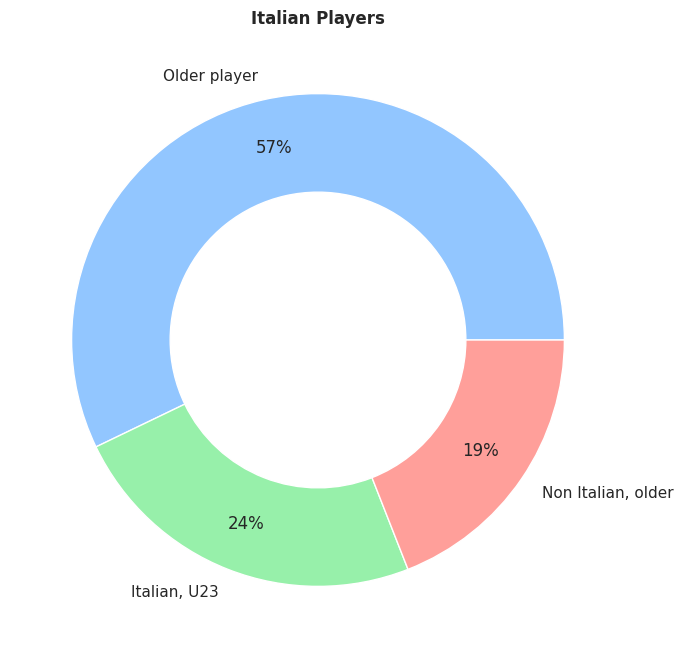

In [ ]:
# Displaying italian players categorized:
squad['U23 and Italian?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Italian Players', fontweight = 'bold')
plt.show()